In [1]:
## importing lbiraries & data

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
path = "../Datasets"

import os
#Actual absolute path
cwd = os.getcwd()
#print(cwd)

In [3]:
# one level up directory. Datasets directory
os.chdir(path)
#Actual absolute path
cwd = os.getcwd()
#print(cwd)

In [4]:
# path file current dir + file name
path_file = cwd + '/churn_data.csv'
#print(path_file)

In [5]:
# import dataset

dataset = pd.read_csv(path_file)
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [6]:
# EDA
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [7]:
dataset.shape # 31 x columns - 27000 records

(27000, 31)

# STEP 2: EDA & CLEANING DATA

In [8]:
#count how many null values we have in each column
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [9]:
## Cleaning Data --> Removin NaN

# regarding the amount of null values we drop two columns and 4 cases for age
dataset = dataset[pd.notnull(dataset['age'])]
dataset = dataset.drop(columns = ['credit_score','rewards_earned'])

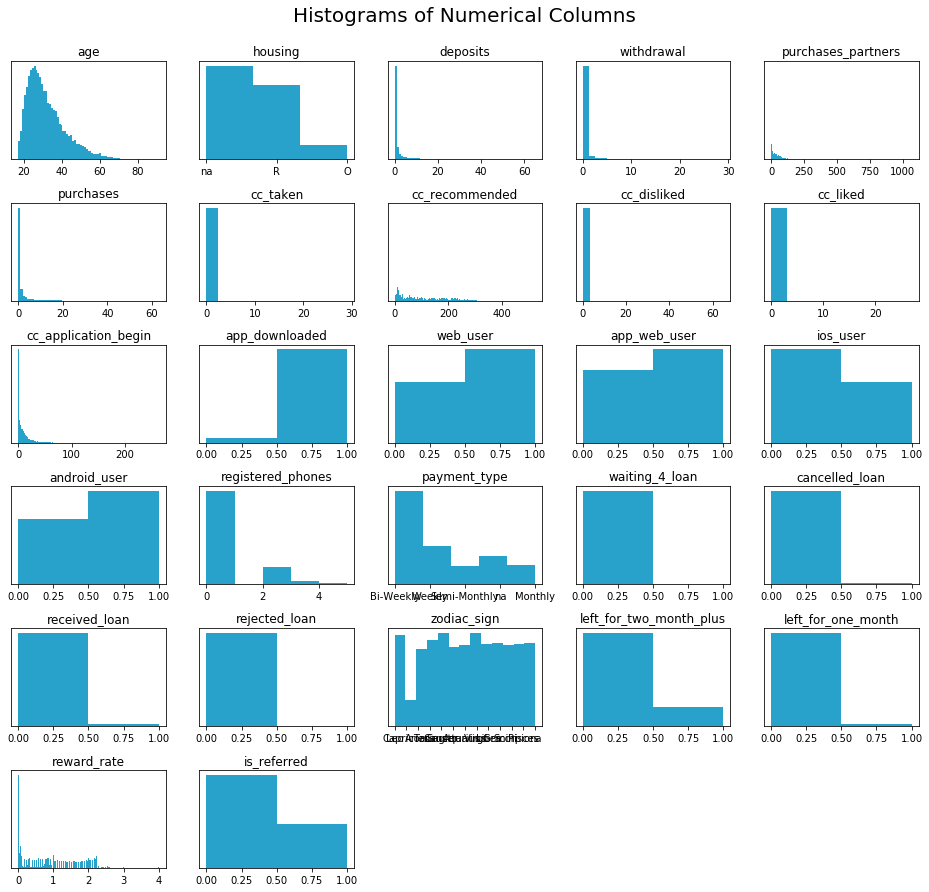

In [10]:
## Visualizing data
  
### Histograms

dataset2 = dataset.drop(columns = ['user', 'churn'])

plt.figure(figsize=(13,13))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
# Create a new subfigure for each feature
for i in range(1, dataset2.shape[1] + 1):
  plt.subplot(6,5, i)
  plt.subplots_adjust()
  f = plt.gca() #new figure with default axis
  
  # Dont show Y axis
  f.axes.get_yaxis().set_visible(False)
  
  # setting subtitle of Figure
  f.set_title(dataset2.columns.values[i-1])
  
  # calculate the total unique values
  vals = np.size(dataset2.iloc[:, i -1].unique())
  
  values = [dataset2.iloc[:, i - 1]]
  
  # Create new plot
  plt.hist(values, bins = vals, color = "#29A2CB")
  plt.subplots_adjust(hspace=0.9, top = 0.9)

plt.tight_layout(rect=[0,0.03,1,0.95])

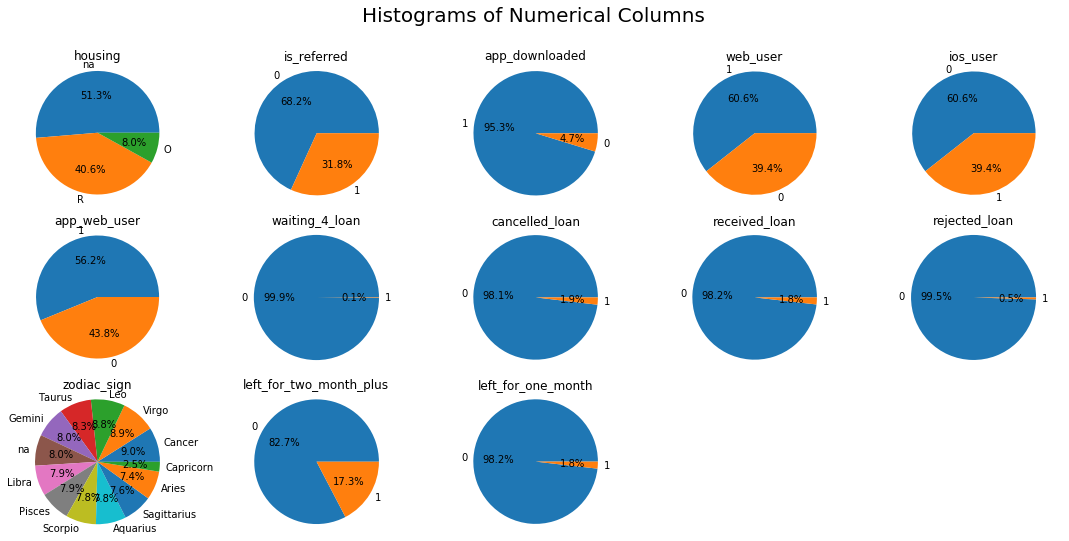

In [11]:
# Pie plots visualization   
dataset2 = dataset[['housing','is_referred','app_downloaded','web_user',
                    'ios_user','app_web_user','waiting_4_loan', 'cancelled_loan',
                    'received_loan','rejected_loan','zodiac_sign',
                    'left_for_two_month_plus','left_for_one_month']]

plt.figure(figsize=(15,15))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
# Create a new subfigure for each feature
for i in range(1, dataset2.shape[1] + 1):
  plt.subplot(6,5, i)
  plt.subplots_adjust()
  f = plt.gca() #new figure with default axis
  
  # Dont show Y axis
  f.axes.get_yaxis().set_visible(False)
  
  # setting subtitle of Figure
  f.set_title(dataset2.columns.values[i-1])
  
  # calculate the values & index
  values = dataset2.iloc[:, i - 1].value_counts(normalize= True).values
  index = dataset2.iloc[:, i - 1].value_counts(normalize= True).index
  
  # Create new plot
  plt.pie(values,labels = index, autopct='%1.1f%%')
  plt.axis('equal') # dont show label of axis.. only information
plt.tight_layout(rect=[0,0.03,1,0.95])


In [12]:
# Correlation between churn variable with some variables
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [13]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [14]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [15]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [16]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

In [17]:
# Explorin Uneven Features
dataset3 = dataset.drop(columns = ['churn','user','housing','payment_type','zodiac_sign'])

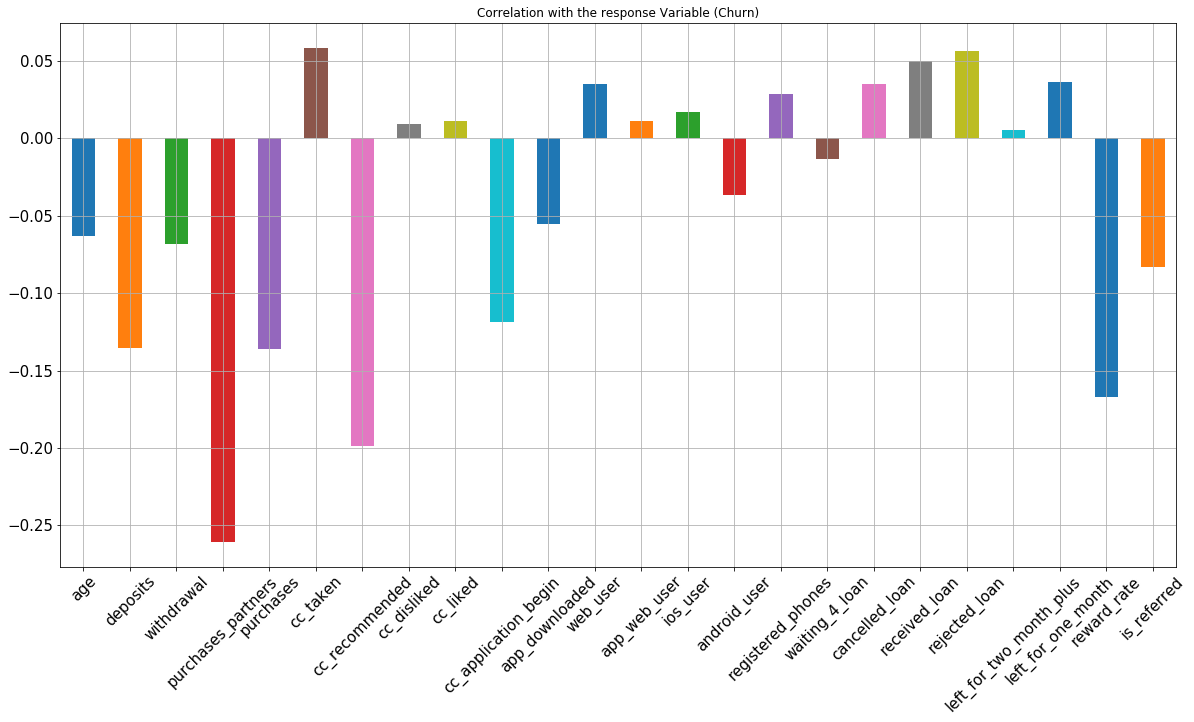

In [18]:
dataset3.corrwith(dataset.churn).plot.bar(
    figsize = (20,10), title = 'Correlation with the response Variable (Churn)', fontsize = 15,
    rot = 45, grid = True)


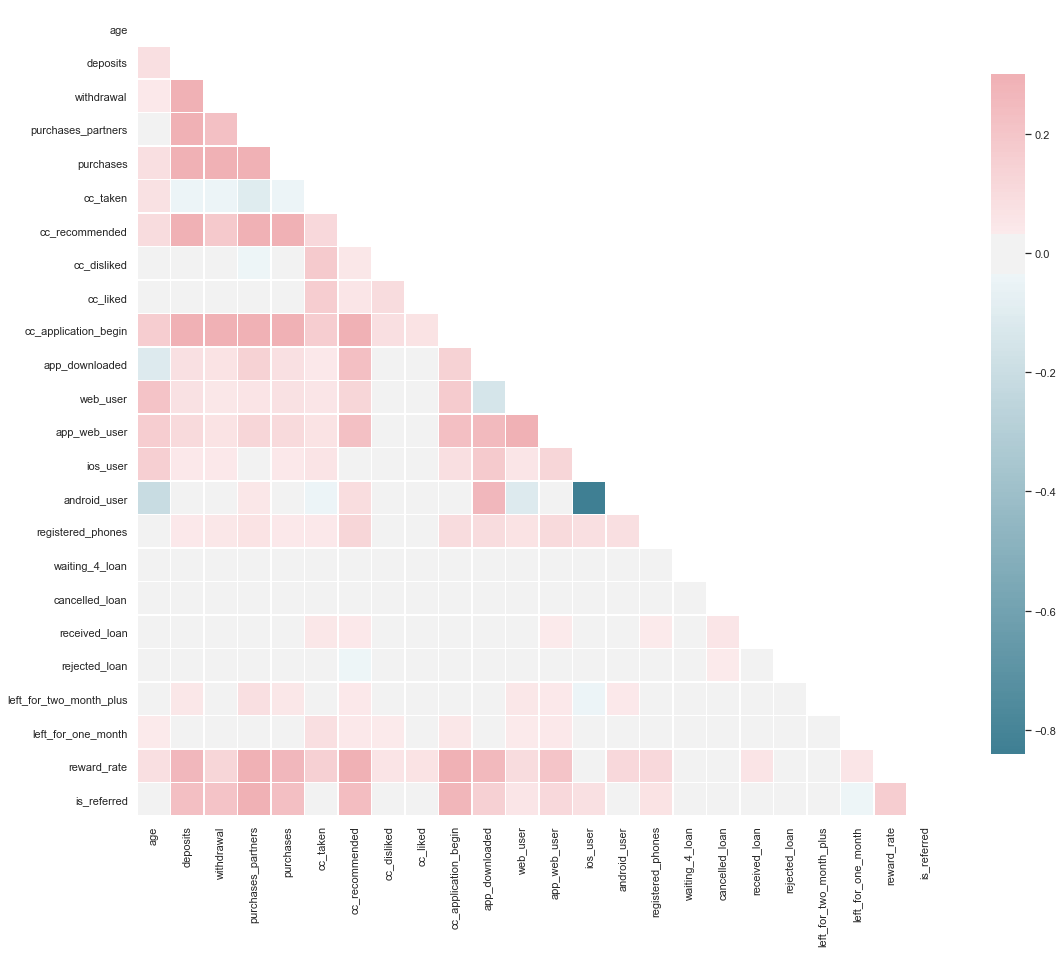

In [19]:
## Correlation Matrix
sns.set(style="white")

## Compute the correlation matrix
corr = dataset.drop(columns = ['user','churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,25))

cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect Ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# Drop app_web_user variable. Generate linear deppendency with android_user
dataset = dataset.drop(columns = ['app_web_user'])

# Export result to start working with a clean dataset
dataset.to_csv('new_churn_data.csv', index= False)